In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
data=pd.read_csv("House_Rent_Dataset.csv")
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
data.shape

(4746, 12)

In [4]:
data.dtypes

Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [5]:
data.drop(["Posted On","Floor","Point of Contact"],axis=1,inplace=True)

In [6]:
data["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [7]:
data["Area Type"].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

# Data Cleaning

In [8]:
data.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
dtype: int64

In [9]:
data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2


In [10]:
le_area_type=LabelEncoder()
data["Area Type"]=le_area_type.fit_transform(data["Area Type"])

le_area_locality=LabelEncoder()
data["Area Locality"]=le_area_locality.fit_transform(data["Area Locality"])

le_city=LabelEncoder()
data["City"]=le_city.fit_transform(data["City"])

le_furnishing_status=LabelEncoder()
data["Furnishing Status"]=le_furnishing_status.fit_transform(data["Furnishing Status"])

le_tenant_preferred=LabelEncoder()
data["Tenant Preferred"]=le_tenant_preferred.fit_transform(data["Tenant Preferred"])

data

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,2,221,4,2,1,2
1,2,20000,800,2,1527,4,1,1,1
2,2,17000,1000,2,1760,4,1,1,1
3,2,10000,800,2,526,4,2,1,1
4,2,7500,850,1,1890,4,2,0,1
...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,1,219,3,1,1,2
4742,3,29000,2000,2,1214,3,1,1,3
4743,3,35000,1750,1,724,3,1,1,3
4744,3,45000,1500,1,590,3,1,2,2


{'whiskers': [<matplotlib.lines.Line2D at 0x203ae358850>,
 'caps': [<matplotlib.lines.Line2D at 0x203adaba390>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203ae58bb50>],
 'medians': [<matplotlib.lines.Line2D at 0x203ae59ba90>],
 'fliers': [<matplotlib.lines.Line2D at 0x203ae5a4550>],
 'means': []}

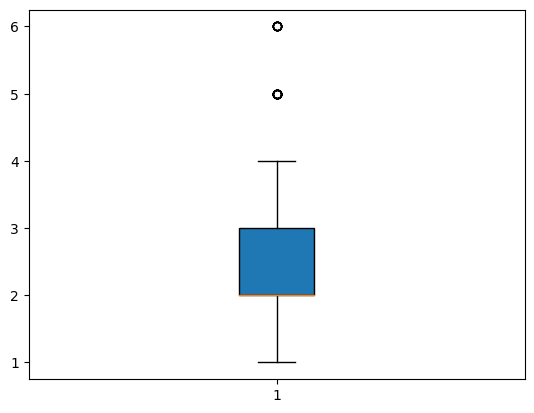

In [11]:
plt.boxplot(data["BHK"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x203b079f5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x203b07acb10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203b079e3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x203b077fe90>],
 'fliers': [<matplotlib.lines.Line2D at 0x203ae570f50>],
 'means': []}

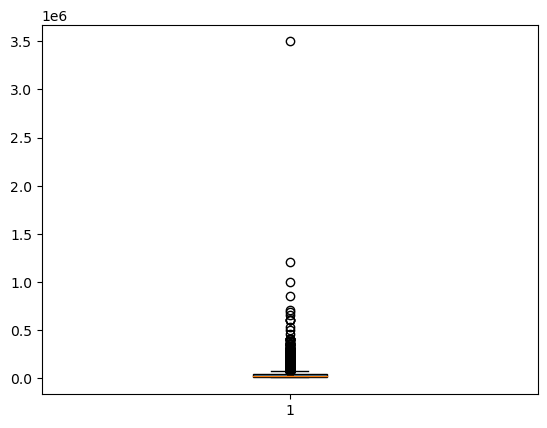

In [12]:
plt.boxplot(data["Rent"],patch_artist=True)

In [13]:
print(f'Old shape of data: {data.shape}')

Q1=data.Rent.quantile(0.25)
Q3=data.Rent.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

upper_index=np.where(data["Rent"]>=upper)[0]
lower_index=np.where(data["Rent"]<=lower)[0]

data.drop(index=upper_index,inplace=True)
data.drop(index=lower_index,inplace=True)

print(f'New Shape of data: {data.shape}')

Old shape of data: (4746, 9)
10000.0 33000.0 23000.0
New Shape of data: (4226, 9)


{'whiskers': [<matplotlib.lines.Line2D at 0x203b07f07d0>,
 'caps': [<matplotlib.lines.Line2D at 0x203ae5f0190>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203b0809e50>],
 'medians': [<matplotlib.lines.Line2D at 0x203ae5f16d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x203ae5f2150>],
 'means': []}

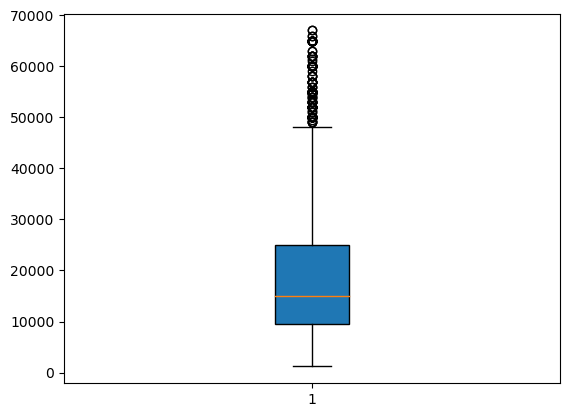

In [14]:
plt.boxplot(data["Rent"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x203ae64fe50>,
 'caps': [<matplotlib.lines.Line2D at 0x203ae65d310>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203ae64f290>],
 'medians': [<matplotlib.lines.Line2D at 0x203ae65ead0>],
 'fliers': [<matplotlib.lines.Line2D at 0x203b07afcd0>],
 'means': []}

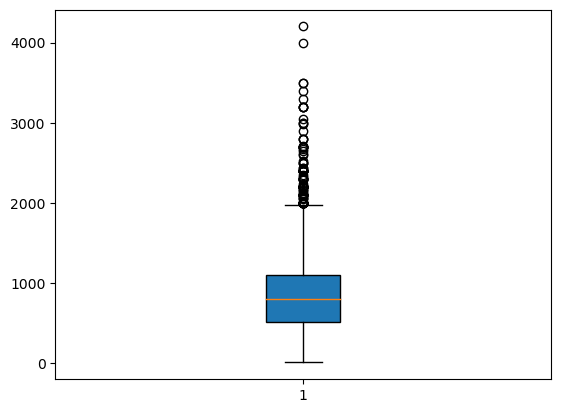

In [15]:
plt.boxplot(data["Size"],patch_artist=True)

In [16]:
data.reset_index(inplace=True)
data.drop("index",axis=1,inplace=True)

In [17]:
print(f'Old Shape of data: {data.shape}')

Q1=data.Size.quantile(0.25)
Q3=data.Size.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3,IQR)

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR

upper_index=np.where(data["Size"]>=upper)[0]
lower_index=np.where(data["Size"]<=lower)[0]

data.drop(index=upper_index,inplace=True)
data.drop(index=lower_index,inplace=True)

print(f'New Shape of data: {data.shape}')

Old Shape of data: (4226, 9)
520.0 1100.0 580.0
New Shape of data: (4102, 9)


{'whiskers': [<matplotlib.lines.Line2D at 0x203ae6b9650>,
 'caps': [<matplotlib.lines.Line2D at 0x203ae6ba750>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203ae68bf10>],
 'medians': [<matplotlib.lines.Line2D at 0x203ae6bb690>],
 'fliers': [<matplotlib.lines.Line2D at 0x203ae6a9e50>],
 'means': []}

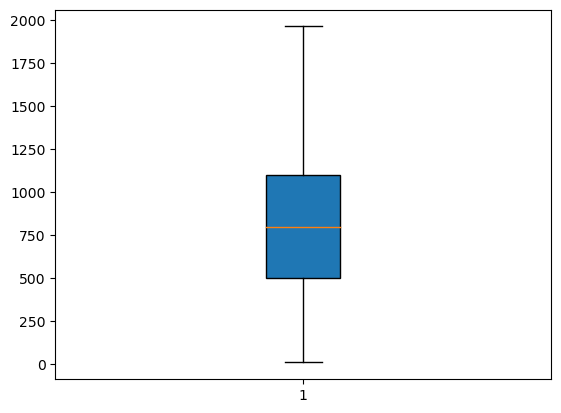

In [18]:
plt.boxplot(data["Size"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x203b1966950>,
 'caps': [<matplotlib.lines.Line2D at 0x203b197c050>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203b1965cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x203b197d650>],
 'fliers': [<matplotlib.lines.Line2D at 0x203b197e050>],
 'means': []}

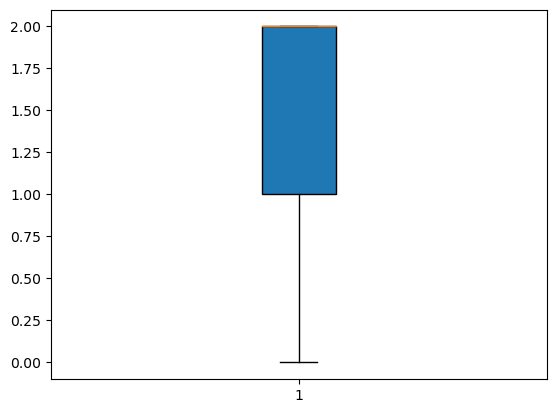

In [19]:
plt.boxplot(data["Area Type"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x203b19987d0>,
 'caps': [<matplotlib.lines.Line2D at 0x203b19f1190>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203ae6216d0>],
 'medians': [<matplotlib.lines.Line2D at 0x203b19f2650>],
 'fliers': [<matplotlib.lines.Line2D at 0x203b19f0c90>],
 'means': []}

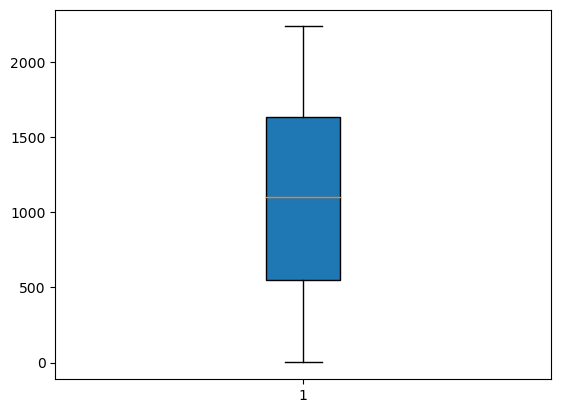

In [20]:
plt.boxplot(data["Area Locality"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x203b1808b90>,
 'caps': [<matplotlib.lines.Line2D at 0x203b1809f90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203b1803e10>],
 'medians': [<matplotlib.lines.Line2D at 0x203b180b510>],
 'fliers': [<matplotlib.lines.Line2D at 0x203b1a05410>],
 'means': []}

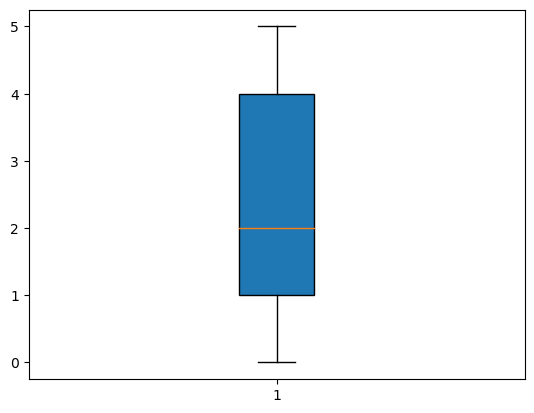

In [21]:
plt.boxplot(data["City"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x203b19dfb90>,
 'caps': [<matplotlib.lines.Line2D at 0x203b1879290>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203b1827050>],
 'medians': [<matplotlib.lines.Line2D at 0x203b187a990>],
 'fliers': [<matplotlib.lines.Line2D at 0x203b1809950>],
 'means': []}

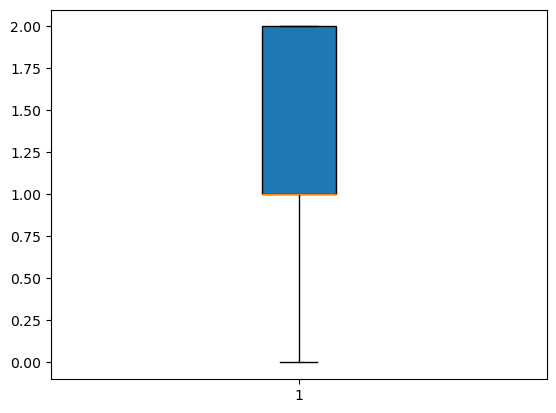

In [22]:
plt.boxplot(data["Furnishing Status"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x203b18ed350>,
 'caps': [<matplotlib.lines.Line2D at 0x203b18ee790>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203b18e3f90>],
 'medians': [<matplotlib.lines.Line2D at 0x203b18efe10>],
 'fliers': [<matplotlib.lines.Line2D at 0x203b1a38910>],
 'means': []}

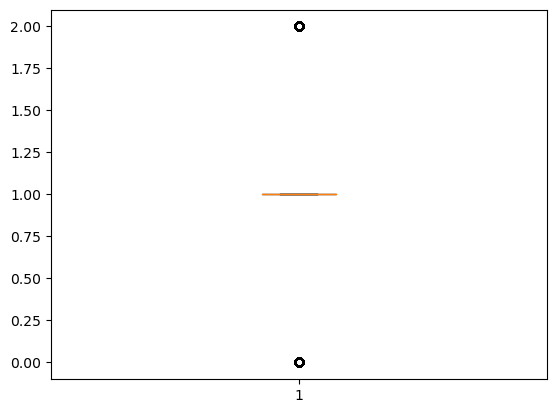

In [23]:
plt.boxplot(data["Tenant Preferred"],patch_artist=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x203b1a99250>,
 'caps': [<matplotlib.lines.Line2D at 0x203b1a9a890>,
 'boxes': [<matplotlib.patches.PathPatch at 0x203b1a98550>],
 'medians': [<matplotlib.lines.Line2D at 0x203b1a9bdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x203b1aa8790>],
 'means': []}

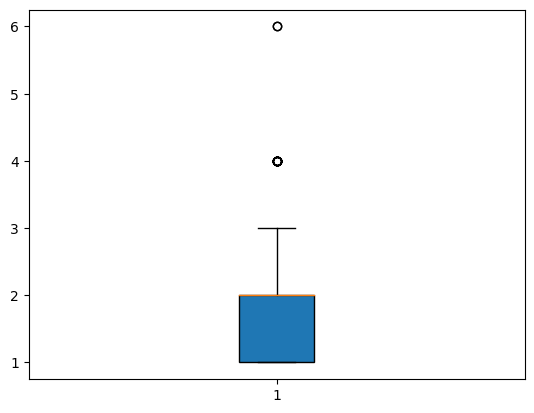

In [24]:
plt.boxplot(data["Bathroom"],patch_artist=True)

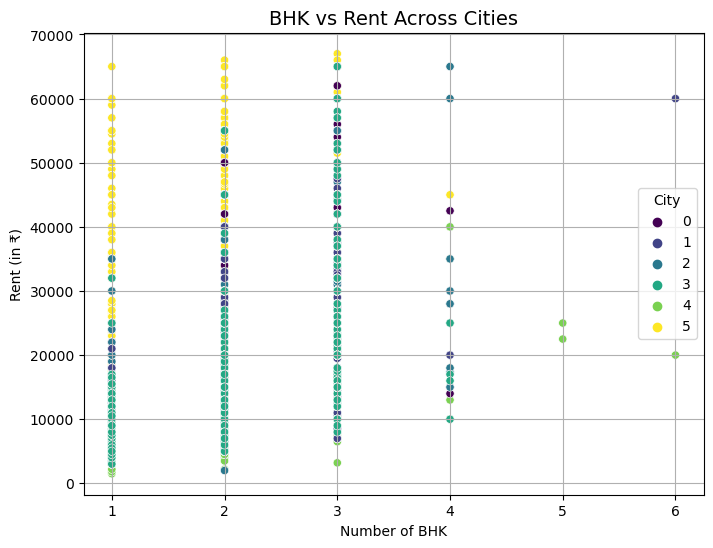

In [25]:
# Scatter Plot: BHK vs Rent

plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x="BHK",y="Rent",hue="City",palette="viridis")
plt.title("BHK vs Rent Across Cities", fontsize=14)
plt.xlabel("Number of BHK")
plt.ylabel("Rent (in ₹)")
plt.grid(True)
plt.show()

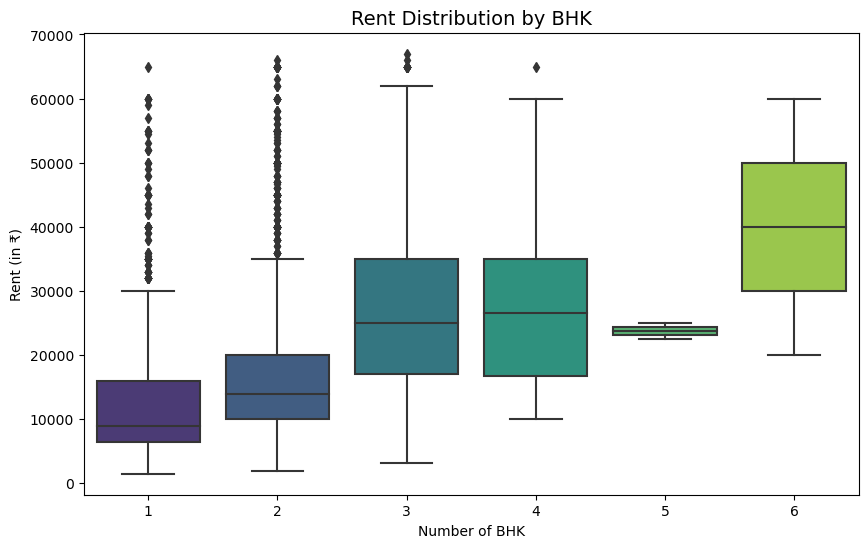

In [26]:
# Box Plot: Rent by BHK

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="BHK", y="Rent", palette="viridis")
plt.title("Rent Distribution by BHK", fontsize=14)
plt.xlabel("Number of BHK")
plt.ylabel("Rent (in ₹)")
plt.show()

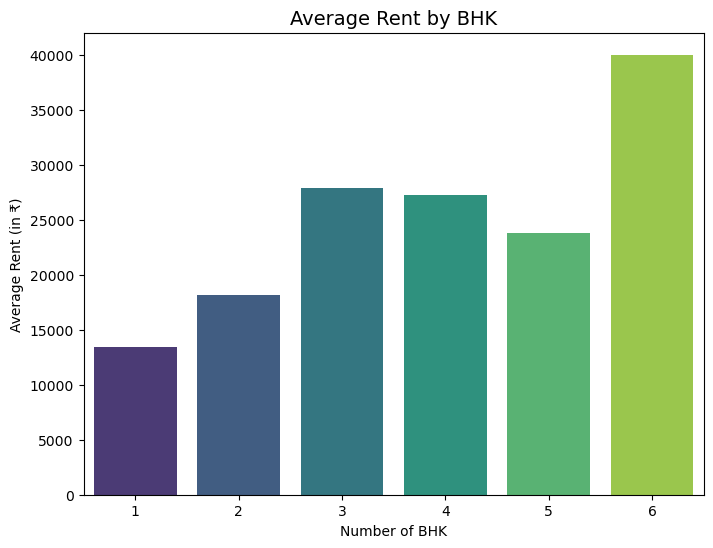

In [27]:
# Bar Plot: Average Rent by BHK

avg_rent_by_bhk = data.groupby("BHK")["Rent"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_rent_by_bhk, x="BHK", y="Rent", palette="viridis")
plt.title("Average Rent by BHK", fontsize=14)
plt.xlabel("Number of BHK")
plt.ylabel("Average Rent (in ₹)")
plt.show()

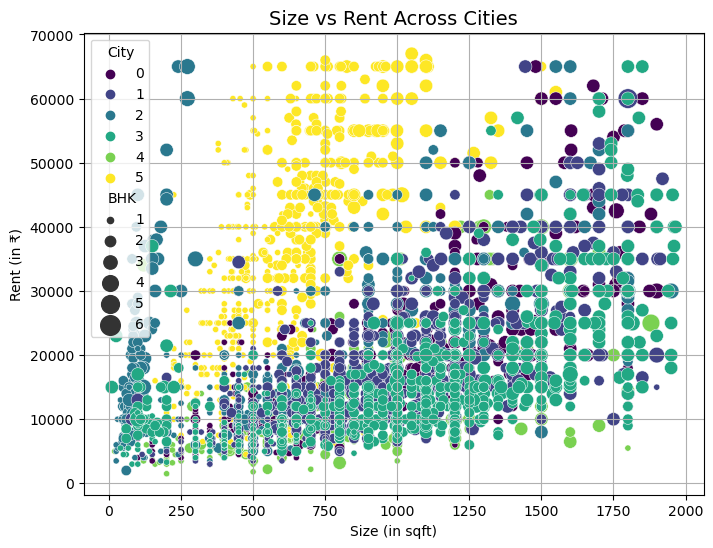

In [28]:
# Scatter Plot: Size vs Rent

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Size", y="Rent", hue="City", size="BHK", sizes=(20, 200),palette="viridis")
plt.title("Size vs Rent Across Cities", fontsize=14)
plt.xlabel("Size (in sqft)")
plt.ylabel("Rent (in ₹)")
plt.grid(True)
plt.show()

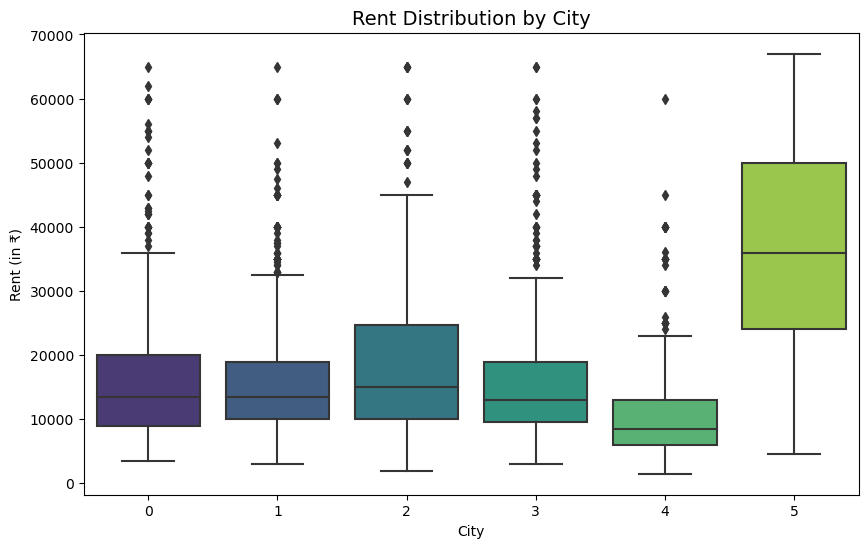

In [29]:
# Box Plot: Rent by City

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="City", y="Rent", palette="viridis")
plt.title("Rent Distribution by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Rent (in ₹)")
plt.show()

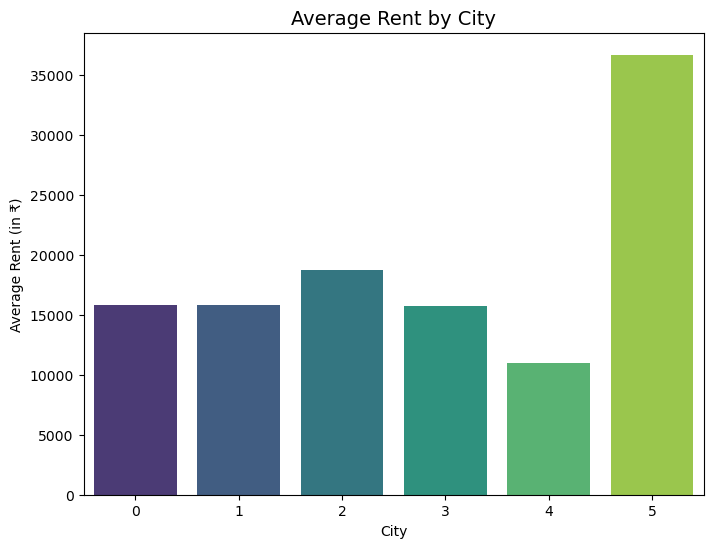

In [30]:
# Bar Plot: Average Rent by City

avg_rent_by_city = data.groupby("City")["Rent"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_rent_by_city, x="City", y="Rent", palette="viridis")
plt.title("Average Rent by City", fontsize=14)
plt.xlabel("City")
plt.ylabel("Average Rent (in ₹)")
plt.show()

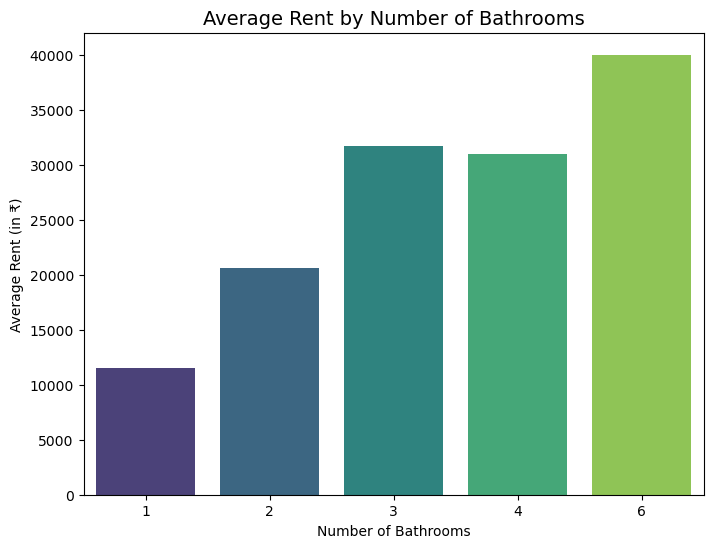

In [31]:
# Bar Plot: Average Rent by Bathrooms

avg_rent_by_bathroom = data.groupby("Bathroom")["Rent"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_rent_by_bathroom, x="Bathroom", y="Rent", palette="viridis")
plt.title("Average Rent by Number of Bathrooms", fontsize=14)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Rent (in ₹)")
plt.show()

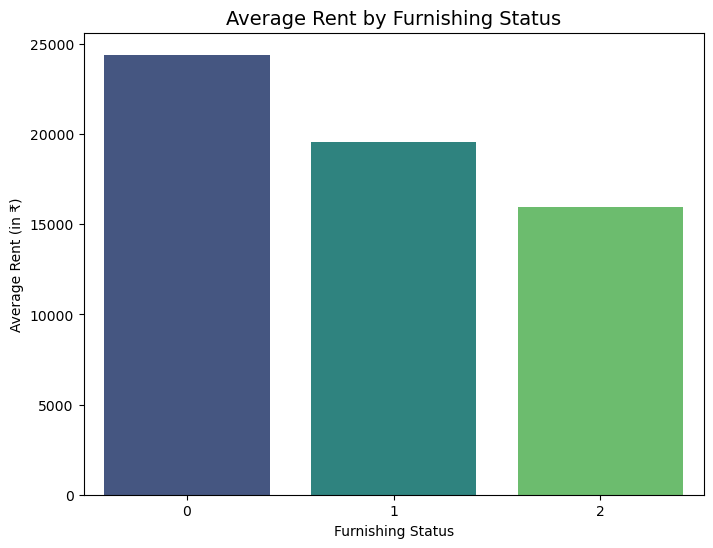

In [32]:
# Bar Plot: Average Rent by Furnishing Status

avg_rent_by_furnishing = data.groupby("Furnishing Status")["Rent"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_rent_by_furnishing, x="Furnishing Status", y="Rent", palette="viridis")
plt.title("Average Rent by Furnishing Status", fontsize=14)
plt.xlabel("Furnishing Status")
plt.ylabel("Average Rent (in ₹)")
plt.show()

In [33]:
correlation=data.corr()
correlation

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
BHK,1.000000,0.356642,0.672758,-0.052857,0.028123,-0.068334,-0.082577,0.024249,0.721905
Rent,0.356642,1.000000,0.319092,-0.321188,0.007279,0.315010,-0.203519,-0.017429,0.472011
Size,0.672758,0.319092,1.000000,0.027362,-0.003117,-0.149884,-0.143201,0.039249,0.645288
Area Type,-0.052857,-0.321188,0.027362,1.000000,-0.015812,-0.220135,0.006082,0.192791,-0.074333
Area Locality,0.028123,0.007279,-0.003117,-0.015812,1.000000,-0.027804,0.022877,-0.017707,0.030340
City,-0.068334,0.315010,-0.149884,-0.220135,-0.027804,1.000000,0.082347,-0.000257,-0.022236
Furnishing Status,-0.082577,-0.203519,-0.143201,0.006082,0.022877,0.082347,1.000000,-0.092034,-0.141410
Tenant Preferred,0.024249,-0.017429,0.039249,0.192791,-0.017707,-0.000257,-0.092034,1.000000,0.053277
Bathroom,0.721905,0.472011,0.645288,-0.074333,0.030340,-0.022236,-0.141410,0.053277,1.000000


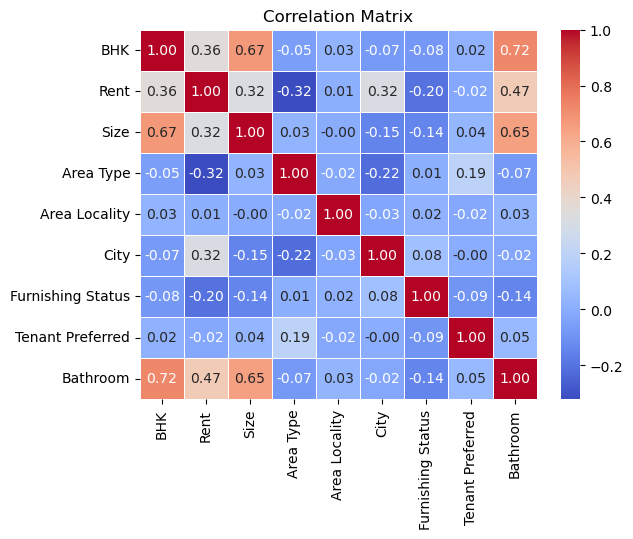

In [34]:
sns.heatmap(correlation,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [35]:
min_correlation = correlation.min().min()
print(f"The lowest correlation value is: {min_correlation}")

The lowest correlation value is: -0.3211875571331141


In [36]:
min_corr_pair = correlation.stack().idxmin()
print(f"The pair of features with the lowest correlation is: {min_corr_pair}")

The pair of features with the lowest correlation is: ('Rent', 'Area Type')


In [37]:
x=data.drop("Rent",axis=1)
y=data["Rent"]

In [38]:
x

,BHK,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,1100,2,221,4,2,1,2
1,2,800,2,1527,4,1,1,1
2,2,1000,2,1760,4,1,1,1
3,2,800,2,526,4,2,1,1
4,2,850,1,1890,4,2,0,1
...,...,...,...,...,...,...,...,...
4220,2,1350,2,1434,3,2,1,2
4221,2,1000,1,219,3,1,1,2
4223,3,1750,1,724,3,1,1,3
4224,3,1500,1,590,3,1,2,2


In [39]:
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4220    12000
4221    15000
4223    35000
4224    45000
4225    15000
Name: Rent, Length: 4102, dtype: int64

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=25)

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3076, 8)
(3076,)
(1026, 8)
(1026,)


In [42]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_test_score = lr.score(x_test, y_test)
lr_train_score = lr.score(x_train, y_train)

rf = RandomForestRegressor(n_estimators=100,max_depth=10)
rf.fit(x_train, y_train)
rf_test_score = rf.score(x_test, y_test)
rf_train_score = rf.score(x_train, y_train)

dt= DecisionTreeRegressor(max_depth=10)
dt.fit(x_train, y_train)
dt_test_score = dt.score(x_test, y_test)
dt_train_score = dt.score(x_train, y_train)

knn= KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
knn_test_score = knn.score(x_test, y_test)
knn_train_score = knn.score(x_train, y_train)

svm=SVR(C=1.0)
svm.fit(x_train, y_train)
svm_test_score = svm.score(x_test, y_test)
svm_train_score = svm.score(x_train, y_train)

ab = AdaBoostRegressor(n_estimators=50,learning_rate=1.0)
ab.fit(x_train, y_train)
ab_test_score = ab.score(x_test, y_test)
ab_train_score = ab.score(x_train, y_train)

gb = GradientBoostingRegressor(n_estimators=100,max_depth=3)
gb.fit(x_train, y_train)
gb_test_score = gb.score(x_test, y_test)
gb_train_score = gb.score(x_train, y_train)

xb = XGBRegressor(n_estimators=100,max_depth=6)
xb.fit(x_train, y_train)
xb_test_score = xb.score(x_test, y_test)
xb_train_score = xb.score(x_train, y_train)

In [44]:
pd.DataFrame({"Model":["Linear Regression","Random Forest","Decision Tree","KNN","SVM","AdaBoost","GradientBoosting","XGB"],
             "Training Score":[lr_train_score,rf_train_score,dt_train_score,knn_train_score,svm_train_score,ab_train_score,gb_train_score,xb_train_score],
             "Testing Score":[lr_test_score,rf_test_score,dt_test_score,knn_test_score,svm_test_score,ab_test_score,gb_test_score,xb_test_score]})

,Model,Training Score,Testing Score
0,Linear Regression,0.418000,0.386720
1,Random Forest,0.892442,0.682009
2,Decision Tree,0.882557,0.447555
3,KNN,0.716743,0.545423
4,SVM,-0.073886,-0.076425
5,AdaBoost,0.580540,0.571324
6,GradientBoosting,0.759579,0.692472
7,XGB,0.955282,0.662283


In [45]:
y_pred_xb=xb.predict(x_test)
y_pred_xb

array([51025.125 ,  7903.7075,  6978.1567, ...,  8019.758 ,  8752.655 ,
       14444.113 ], dtype=float32)

In [46]:
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([52607.81113569,  8278.35251449,  6529.61685562, ...,
        5924.6966078 , 10213.58400283, 13474.67414185])

In [47]:
mae_xb=mean_absolute_error(y_test,y_pred_xb)
mse_xb=mean_squared_error(y_test,y_pred_xb)
print(f'XGBoost - MAE: {mae_xb}, MSE: {mse_xb}')

r2_xb=r2_score(y_test,y_pred_xb)
print(f"XGBoost R² Score: {r2_xb}")

xb_cv_scores = cross_val_score(xb, x_train, y_train, cv=5, scoring='r2')
print(f"XGBoost Cross-Validation Scores: {xb_cv_scores}")
print(f"XGBoost Mean Cross-Validation Score: {xb_cv_scores.mean()}")

print()

mae_rf=mean_absolute_error(y_test,y_pred_rf)
mse_rf=mean_squared_error(y_test,y_pred_rf)
print(f'Random Forest - MAE: {mae_rf}, MSE: {mse_rf}')

r2_rf=r2_score(y_test,y_pred_rf)
print(f"Random Forest R² Score: {r2_rf}")

rf_cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='r2')
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean Cross-Validation Score: {rf_cv_scores.mean()}")

XGBoost - MAE: 5223.817472045184, MSE: 59944413.09106932
XGBoost R² Score: 0.6622828146991386
XGBoost Cross-Validation Scores: [0.67645721 0.65648158 0.71723181 0.64252358 0.66537752]
XGBoost Mean Cross-Validation Score: 0.6716143412213608

Random Forest - MAE: 5179.756148124785, MSE: 56442998.764503375
Random Forest R² Score: 0.6820092200464307
Random Forest Cross-Validation Scores: [0.68503294 0.65474683 0.71826476 0.64545536 0.70144516]
Random Forest Mean Cross-Validation Score: 0.6809890073240203


## So Random Forest is the better model overall in this case.

In [50]:
pickle.dump(rf,open('rfModel.pkl','wb'))